In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
co_lf_cc = pd.read_csv('/ocean/projects/cis240075p/skeshari/igvf/bcell2/primaryBCell/out_data/comb_ctrl/out_files/SLIDE_LF_enriched_TFs.csv', header = 0)
ce_seek_results = pd.read_csv(f"/ocean/projects/cis240075p/skeshari/igvf/bcell2/primaryBCell/out_data/ce_seek/out_files/CEseek_results.csv", header=0)
cicero_cc = pd.read_csv('/ocean/projects/cis240075p/skeshari/igvf/bcell2/primaryBCell/out_data/ce_seek/out_files/correlation_results.csv')

In [29]:
motif_name_list = []
output_file = f"/ocean/projects/cis240075p/skeshari/igvf/bcell2/primaryBCell/out_data/ce_seek/out_files/concatenated_file.txt"
with open(output_file, 'r') as infile:
        for line in infile:
            if line.startswith('>'):
                motif_name_list.append(line.strip().split('\t')[1])

mapping_dict = {key.split('(')[1].split(')')[0]: key for key in motif_name_list}
co_lf_cc['TF1'] = co_lf_cc['TF1_jid'].map(mapping_dict)
co_lf_cc['TF2'] = co_lf_cc['TF2_jid'].map(mapping_dict)

In [38]:
co_lf_cc['key'] = co_lf_cc['TF1'] + '_' + co_lf_cc['TF2']
ce_seek_results['key'] = ce_seek_results['TF1'] + '_' + ce_seek_results['TF2']
cicero_cc['key'] = cicero_cc['TF1'] + '_' + cicero_cc['TF2']
merged_df = pd.merge(co_lf_cc, ce_seek_results, on='key', how='inner')
merged_df = pd.merge(merged_df, cicero_cc, on='key', how='inner')

In [40]:
heatmap_data_co_lf_cc = merged_df[['TF1_x', 'TF2_x', 'Score']].pivot_table(index=['TF1_x'], columns=['TF2_x'], values='Score')
heatmap_data = merged_df[['TF1_x', 'TF2_x', 'Max_Score']].pivot_table(index=['TF1_x'], columns=['TF2_x'], values='Max_Score')
heatmap_data_ce_seek_results = np.log10(heatmap_data)
cicero_cc['jaccard'] = merged_df['cnt_thr_pos_idx'] / merged_df['union_peak_index']
heatmap_data_cicero_cc = merged_df[['TF1_x', 'TF2_x', 'jaccard']].pivot_table(index=['TF1_x'], columns=['TF2_x'], values='jaccard')

In [19]:
ce_seek_results.dropna(inplace=True)
ce_seek_results[['TF1', 'TF2']] = ce_seek_results['Combination'].apply(lambda x: pd.Series(eval(x)))
ce_seek_results.drop(columns=['Combination'], inplace=True)
heatmap_data = ce_seek_results.pivot_table(index=['TF1'], columns=['TF2'], values='Max_Score')
heatmap_data_ce_seek_results = np.log10(heatmap_data)

In [20]:
cicero_cc['jaccard'] = cicero_cc['cnt_thr_pos_idx'] / cicero_cc['union_peak_index']
heatmap_data_cicero_cc = cicero_cc.pivot(index='TF1', columns='TF2', values='jaccard')

In [43]:
heatmap_data_co_lf_cc = (heatmap_data_co_lf_cc - heatmap_data_co_lf_cc.mean()) / heatmap_data_co_lf_cc.std()
heatmap_data_ce_seek_results = (heatmap_data_ce_seek_results - heatmap_data_ce_seek_results.mean()) / heatmap_data_ce_seek_results.std()
heatmap_data_cicero_cc = (heatmap_data_cicero_cc - heatmap_data_cicero_cc.mean()) / heatmap_data_cicero_cc.std()

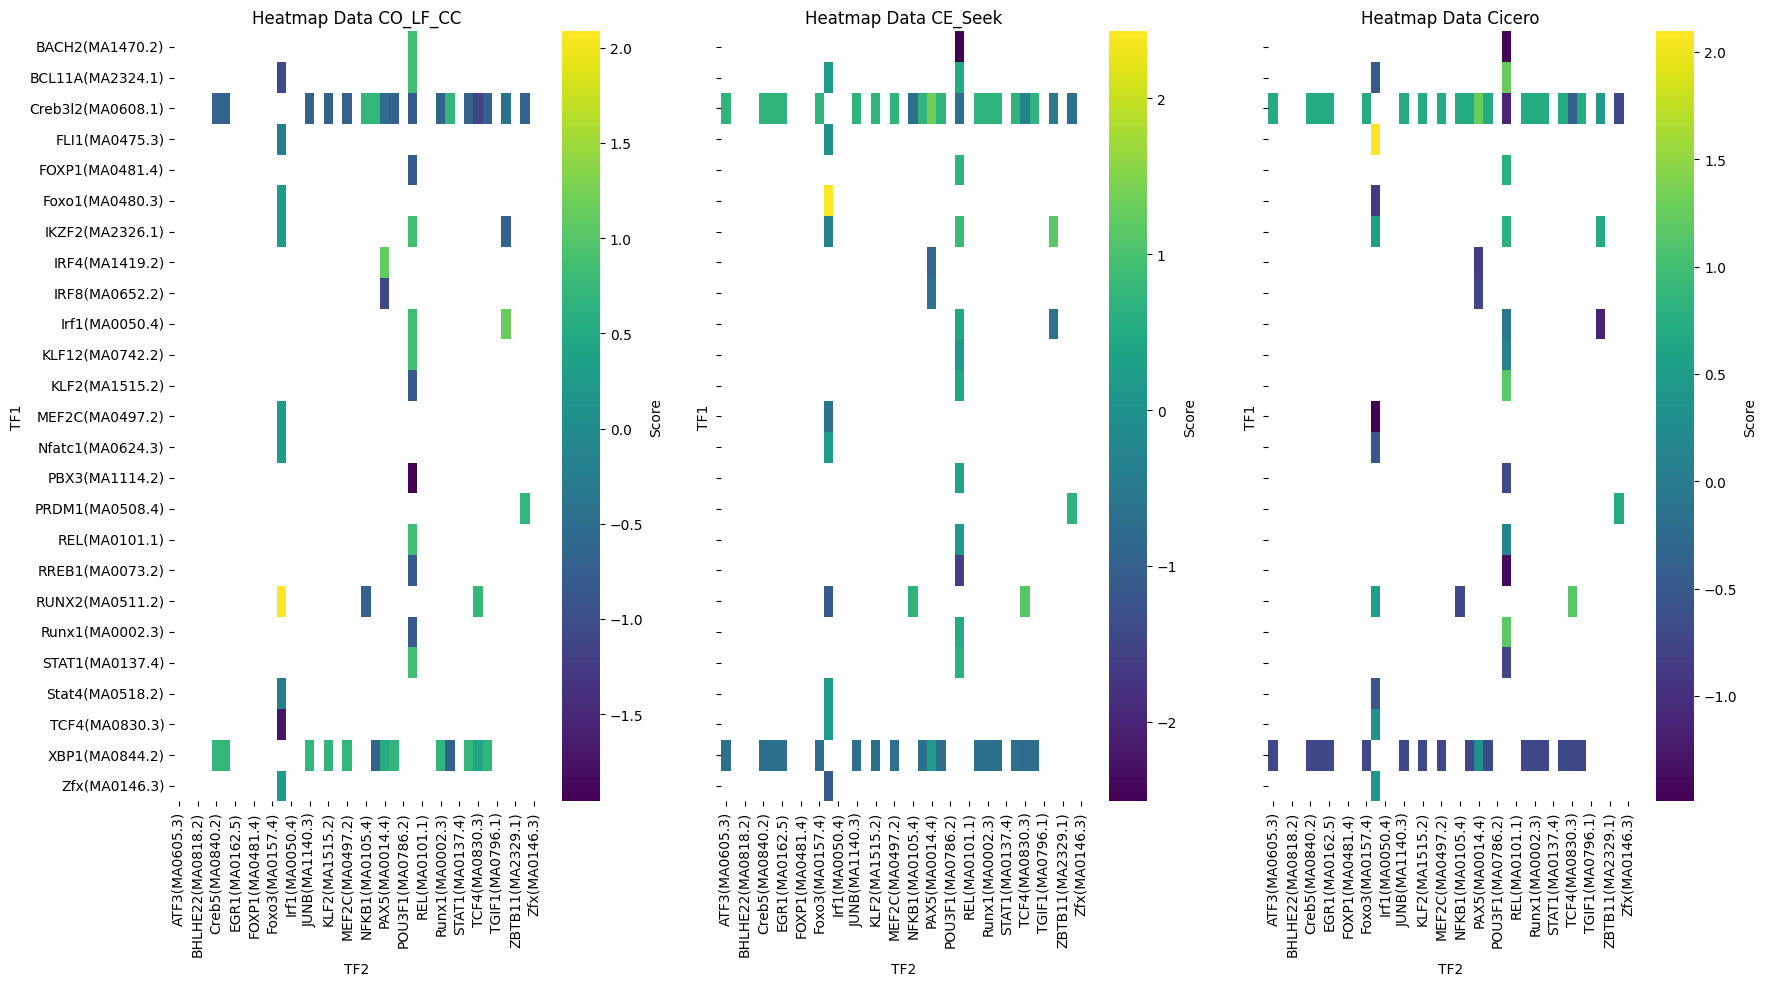

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

sns.heatmap(heatmap_data_co_lf_cc, ax=axes[0], cmap='viridis', annot=False, fmt='.2f', cbar_kws={'label': 'Score'})
axes[0].set_title('Heatmap Data CO_LF_CC')
axes[0].set_xlabel('TF2')
axes[0].set_ylabel('TF1')

sns.heatmap(heatmap_data_ce_seek_results, ax=axes[1], cmap='viridis', annot=False, fmt='.2f', cbar_kws={'label': 'Score'})
axes[1].set_title('Heatmap Data CE_Seek')
axes[1].set_xlabel('TF2')
axes[1].set_ylabel('TF1')

sns.heatmap(heatmap_data_cicero_cc, ax=axes[2], cmap='viridis', annot=False, fmt='.2f', cbar_kws={'label': 'Score'})
axes[2].set_title('Heatmap Data Cicero')
axes[2].set_xlabel('TF2')
axes[2].set_ylabel('TF1')

plt.savefig(f"/ocean/projects/cis240075p/skeshari/igvf/bcell2/primaryBCell/out_data/ce_seek/figures/heatmaps_normalized.pdf")